# Mobile Price Classification Using Neural Network

In [48]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [49]:
# Reading the dataset
data_set = pd.read_csv('train.csv')
data_set.shape

(2000, 21)

In [50]:
# Checking for null values in the dataset
data_set.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [51]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['price_range']

In [52]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1600, 20), (400, 20))

In [53]:
# Scaling the features in the training and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Further splitting the training set into training and validation subsets
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train,
                                                              y_train,
                                                              test_size=0.2, 
                                                              random_state=0)
X_train_nn.shape, X_val_nn.shape

((1280, 20), (320, 20))

In [55]:
import keras
from keras.models import Sequential # type: ignore
from keras.layers import Input, Dense # type: ignore
from keras import optimizers

## ReLU Activation Function

In [64]:
# Designing the neural network
model1 = Sequential()
model1.add(Input(shape=(X_train.shape[1],)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(4, activation='softmax'))

In [65]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.005)
model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model1.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5037 - loss: 1.0985 - val_accuracy: 0.8219 - val_loss: 0.3953
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8817 - loss: 0.2902 - val_accuracy: 0.8594 - val_loss: 0.3288
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9457 - loss: 0.1721 - val_accuracy: 0.9031 - val_loss: 0.2766
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9602 - loss: 0.1027 - val_accuracy: 0.8781 - val_loss: 0.3043
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9602 - loss: 0.0989 - val_accuracy: 0.8938 - val_loss: 0.2903
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9795 - loss: 0.0629 - val_accuracy: 0.9062 - val_loss: 0.2563
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9749 - loss: 0.0623 - val_accuracy: 0.8750 - val_loss: 0.3391
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.1067 - val_accuracy: 0.8938 - val_loss:

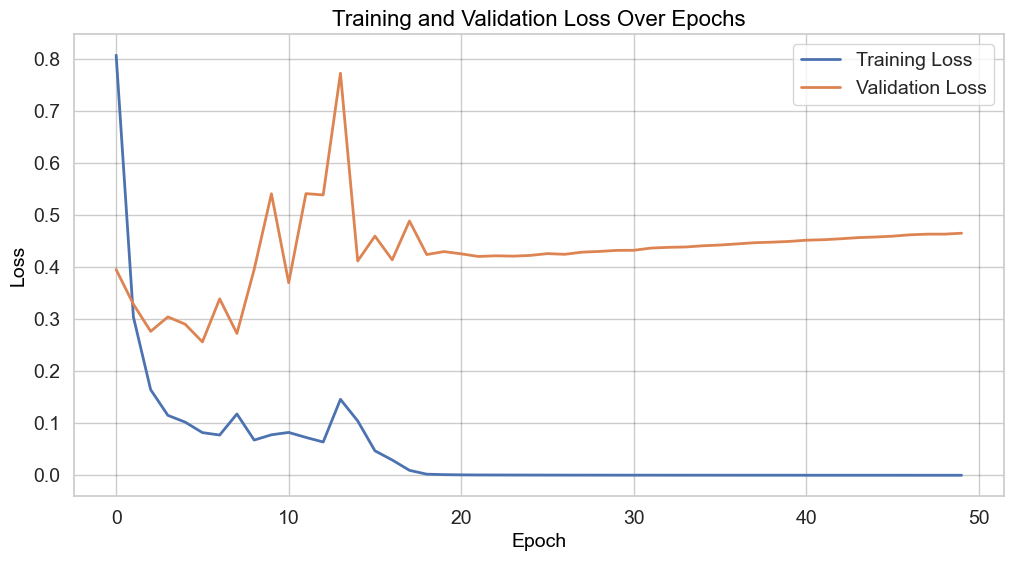

In [66]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

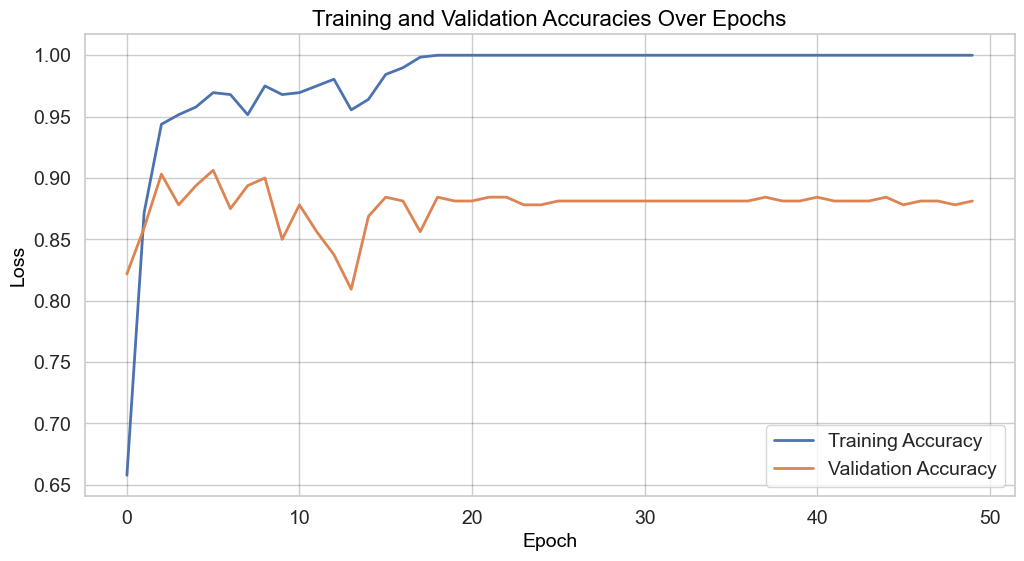

In [67]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [68]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,470 (154.18 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,314 (102.79 KB)

In [69]:
# Predictions for training and test sets
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [70]:
# Convert predictions to class labels
y_train_pred_classes1 = y_train_pred1.argmax(axis=1)
y_test_pred_classes1 = y_test_pred1.argmax(axis=1)

# Training metrics
train_accuracy1 = accuracy_score(y_train, y_train_pred_classes1)
train_precision1 = precision_score(y_train, y_train_pred_classes1, average='macro')
train_recall1 = recall_score(y_train, y_train_pred_classes1, average='macro')
train_f1_1 = f1_score(y_train, y_train_pred_classes1, average='macro')

# Test metrics
test_accuracy1 = accuracy_score(y_test, y_test_pred_classes1)
test_precision1 = precision_score(y_test, y_test_pred_classes1, average='macro')
test_recall1 = recall_score(y_test, y_test_pred_classes1, average='macro')
test_f1_1 = f1_score(y_test, y_test_pred_classes1, average='macro')

In [71]:
print("Training Accuracy (in %):",round(train_accuracy1*100,3))
print("Training Precision (in %):",round(train_precision1*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall1*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1_1*100,3)) # type: ignore
print()
print("Test Accuracy (in %):",round(test_accuracy1*100,3))
print("Test Precision (in %):",round(test_precision1*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall1*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1_1*100,3)) # type: ignore

Training Accuracy (in %): 97.625
Training Precision (in %): 97.632
Training Recall (in %): 97.628
Training F1 Score (in %): 97.63

Test Accuracy (in %): 90.75
Test Precision (in %): 90.689
Test Recall (in %): 90.693
Test F1 Score (in %): 90.638


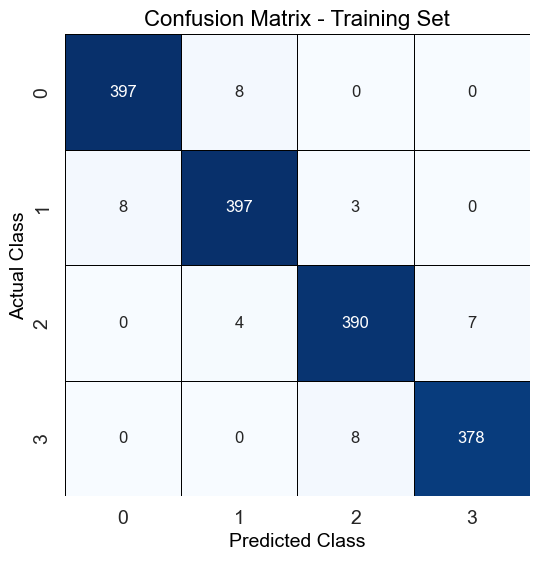

In [72]:
# Confusion matrix for training set
train_conf_matrix1 = confusion_matrix(y_train, y_train_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

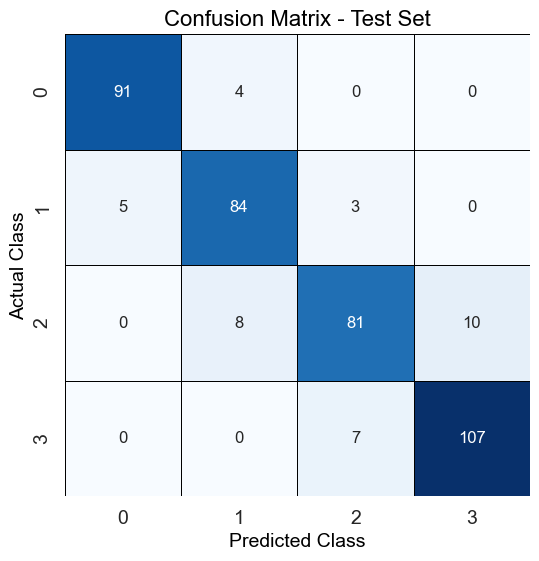

In [73]:
# Confusion matrix for test set
test_conf_matrix1 = confusion_matrix(y_test, y_test_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

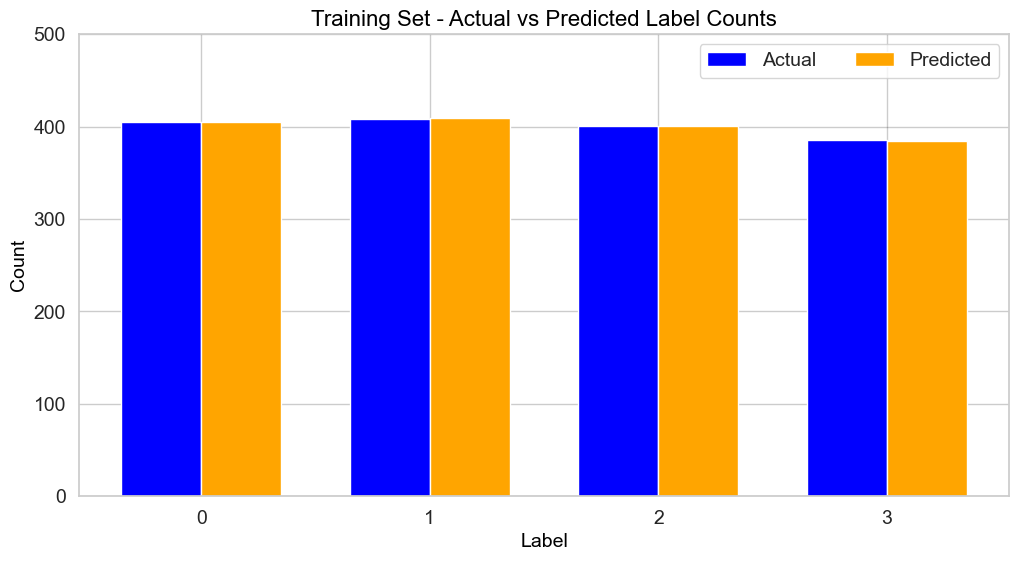

In [74]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts1 = pd.Series(y_train_pred_classes1).value_counts().sort_index()

# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,500)
plt.show()

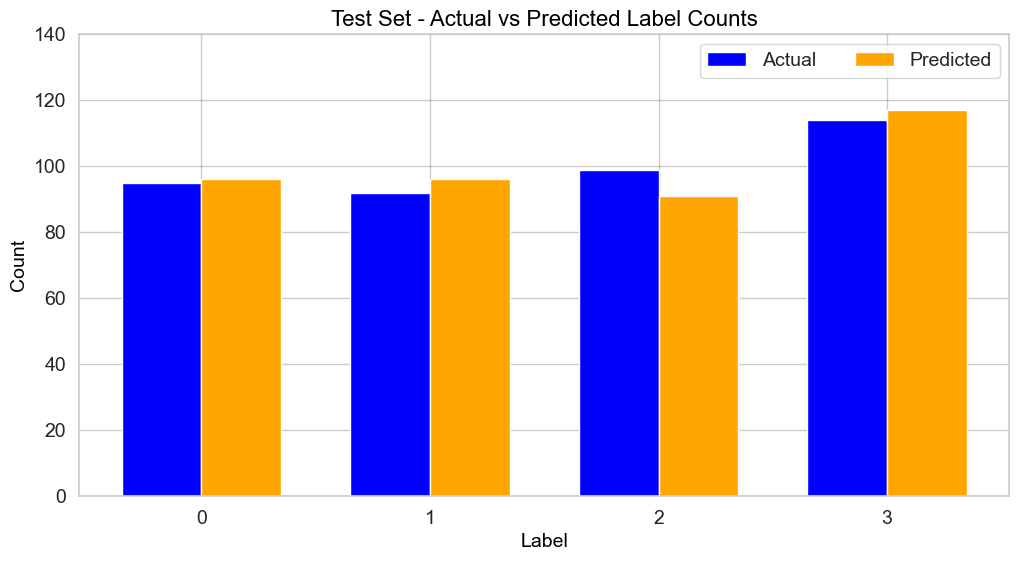

In [75]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts1 = pd.Series(y_test_pred_classes1).value_counts().sort_index()

# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,140)
plt.show()

In [76]:
model1.save('NN_ReLU_MobilePrice.h5')

## Tanh Activation Function

In [22]:
# Designing the neural network
model2 = Sequential()
model2.add(Input(shape=(X_train.shape[1],)))
model2.add(Dense(128, activation='tanh'))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(4, activation='softmax'))

In [23]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.005)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model2.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5446 - loss: 0.9649 - val_accuracy: 0.7688 - val_loss: 0.5113
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.3691 - val_accuracy: 0.8813 - val_loss: 0.2939
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9079 - loss: 0.2431 - val_accuracy: 0.8875 - val_loss: 0.2445
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9353 - loss: 0.1884 - val_accuracy: 0.8844 - val_loss: 0.2746
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9432 - loss: 0.1534 - val_accuracy: 0.9187 - val_loss: 0.1975
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.1158 - val_accuracy: 0.9031 - val_loss: 0.2160
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9436 - loss: 0.1351 - val_accuracy: 0.8813 - val_loss: 0.2621
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9562 - loss: 0.1008 - val_accuracy: 0.8719 - val_loss:

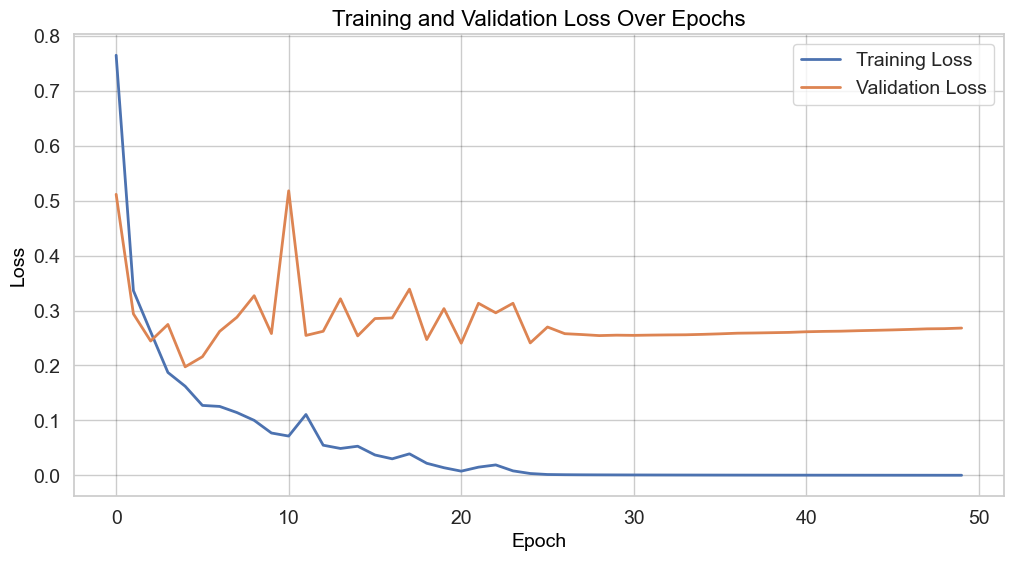

In [24]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

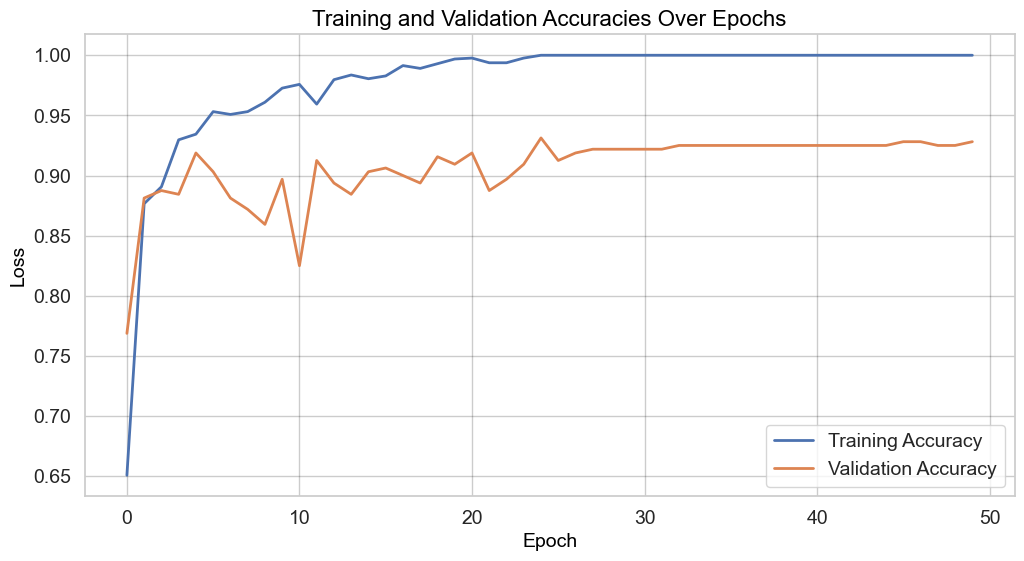

In [25]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [26]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,470 (154.18 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,314 (102.79 KB)

In [27]:
# Predictions for training and test sets
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [28]:
# Convert predictions to class labels
y_train_pred_classes2 = y_train_pred2.argmax(axis=1)
y_test_pred_classes2 = y_test_pred2.argmax(axis=1)

# Training metrics
train_accuracy2 = accuracy_score(y_train, y_train_pred_classes2)
train_precision2 = precision_score(y_train, y_train_pred_classes2, average='macro')
train_recall2 = recall_score(y_train, y_train_pred_classes2, average='macro')
train_f1_2 = f1_score(y_train, y_train_pred_classes2, average='macro')

# Test metrics
test_accuracy2 = accuracy_score(y_test, y_test_pred_classes2)
test_precision2 = precision_score(y_test, y_test_pred_classes2, average='macro')
test_recall2 = recall_score(y_test, y_test_pred_classes2, average='macro')
test_f1_2 = f1_score(y_test, y_test_pred_classes2, average='macro')

In [29]:
print("Training Accuracy (in %):",round(train_accuracy2*100,3))
print("Training Precision (in %):",round(train_precision2*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall2*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1_2*100,3)) # type: ignore
print()
print("Test Accuracy (in %):",round(test_accuracy2*100,3))
print("Test Precision (in %):",round(test_precision2*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall2*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1_2*100,3)) # type: ignore

Training Accuracy (in %): 98.562
Training Precision (in %): 98.569
Training Recall (in %): 98.563
Training F1 Score (in %): 98.564

Test Accuracy (in %): 91.25
Test Precision (in %): 91.168
Test Recall (in %): 91.203
Test F1 Score (in %): 91.182


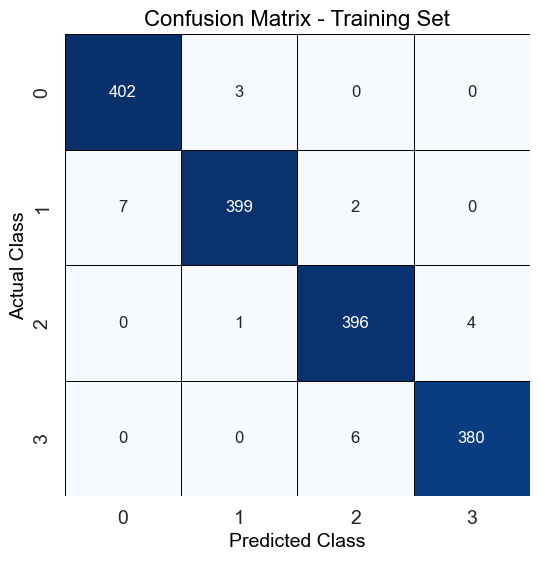

In [30]:
# Confusion matrix for training set
train_conf_matrix2 = confusion_matrix(y_train, y_train_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

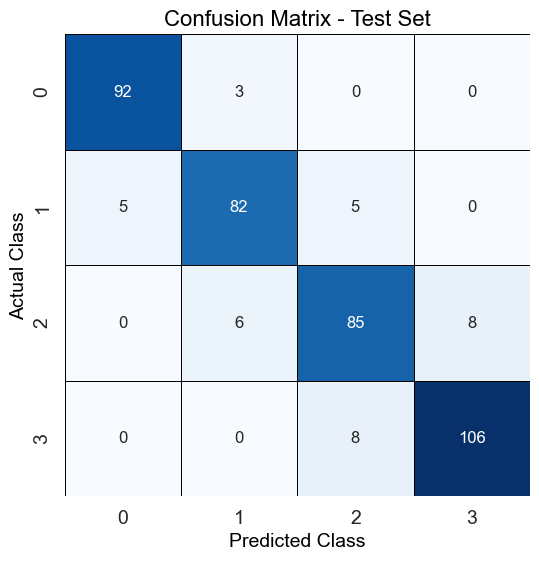

In [31]:
# Confusion matrix for test set
test_conf_matrix2 = confusion_matrix(y_test, y_test_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

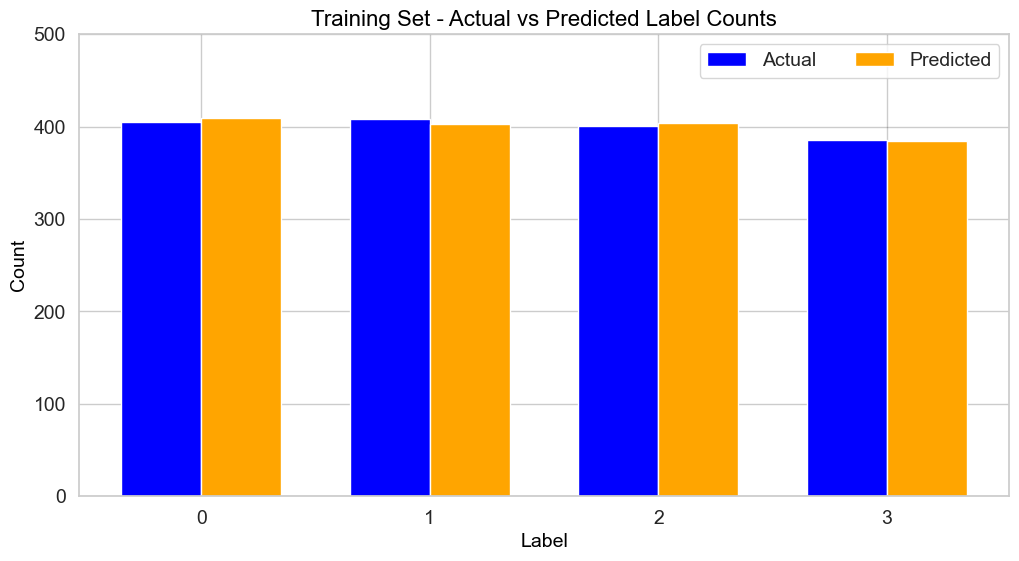

In [32]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts2 = pd.Series(y_train_pred_classes2).value_counts().sort_index()

# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,500)
plt.show()

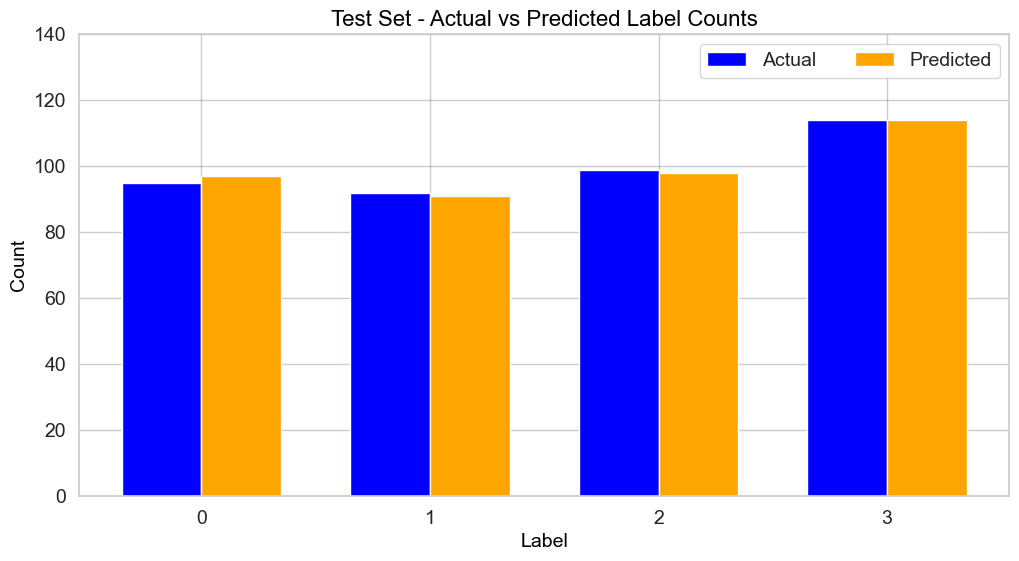

In [33]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts2 = pd.Series(y_test_pred_classes2).value_counts().sort_index()

# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,140)
plt.show()

In [34]:
model2.save('NN_Tanh_MobilePrice.h5')

## Sigmoid Activation Function

In [35]:
# Designing the neural network
model3 = Sequential()
model3.add(Input(shape=(X_train.shape[1],)))
model3.add(Dense(128, activation='sigmoid'))
model3.add(Dense(64, activation='sigmoid'))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(4, activation='softmax'))

In [36]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.005)
model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model3.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2843 - loss: 1.4112 - val_accuracy: 0.3812 - val_loss: 1.3450
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3994 - loss: 1.2672 - val_accuracy: 0.6656 - val_loss: 0.8126
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7869 - loss: 0.6826 - val_accuracy: 0.9094 - val_loss: 0.4084
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9157 - loss: 0.3607 - val_accuracy: 0.8875 - val_loss: 0.2995
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9242 - loss: 0.2380 - val_accuracy: 0.9312 - val_loss: 0.2007
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9453 - loss: 0.1694 - val_accuracy: 0.9250 - val_loss: 0.2069
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9285 - loss: 0.1675 - val_accuracy: 0.9406 - val_loss: 0.1655
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.1374 - val_accuracy: 0.9000 - val_loss:

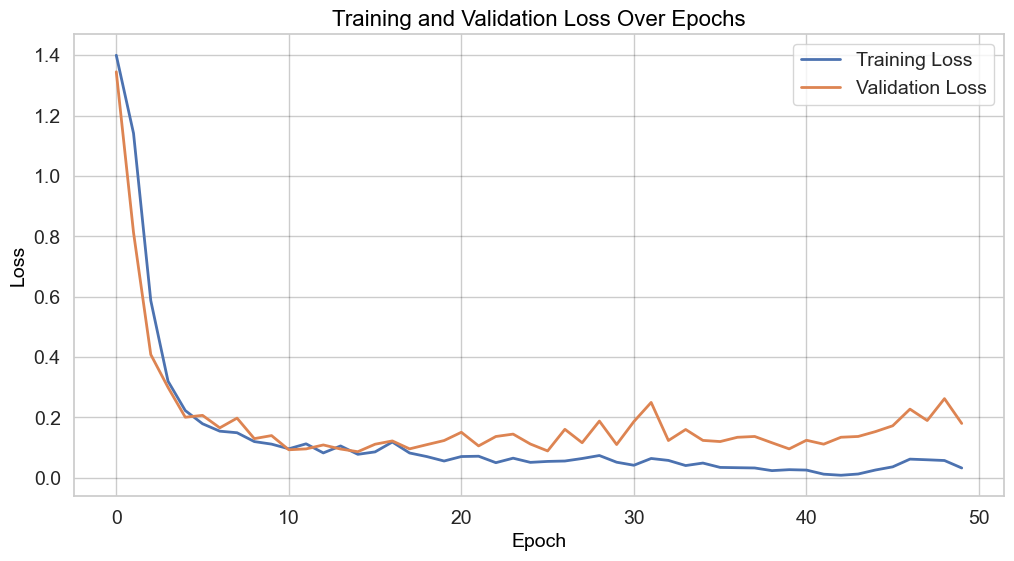

In [37]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

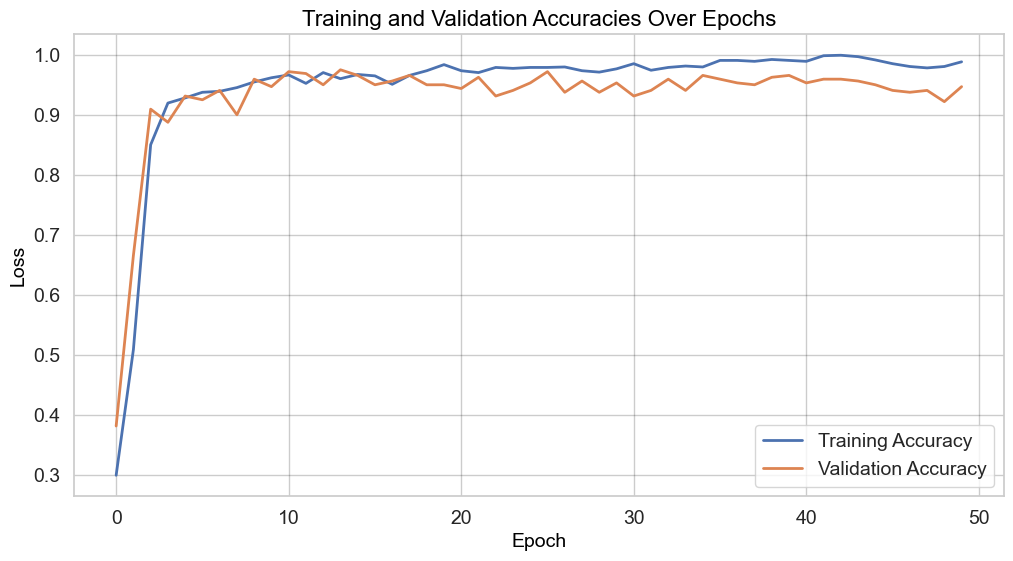

In [38]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [39]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,470 (154.18 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,314 (102.79 KB)

In [40]:
# Predictions for training and test sets
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [41]:
# Convert predictions to class labels
y_train_pred_classes3 = y_train_pred3.argmax(axis=1)
y_test_pred_classes3 = y_test_pred3.argmax(axis=1)

# Training metrics
train_accuracy3 = accuracy_score(y_train, y_train_pred_classes3)
train_precision3 = precision_score(y_train, y_train_pred_classes3, average='macro')
train_recall3 = recall_score(y_train, y_train_pred_classes3, average='macro')
train_f1_3 = f1_score(y_train, y_train_pred_classes3, average='macro')

# Test metrics
test_accuracy3 = accuracy_score(y_test, y_test_pred_classes3)
test_precision3 = precision_score(y_test, y_test_pred_classes3, average='macro')
test_recall3 = recall_score(y_test, y_test_pred_classes3, average='macro')
test_f1_3 = f1_score(y_test, y_test_pred_classes3, average='macro')

In [42]:
print("Training Accuracy (in %):",round(train_accuracy3*100,3))
print("Training Precision (in %):",round(train_precision3*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall3*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1_3*100,3)) # type: ignore
print()
print("Test Accuracy (in %):",round(test_accuracy3*100,3))
print("Test Precision (in %):",round(test_precision3*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall3*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1_3*100,3)) # type: ignore

Training Accuracy (in %): 98.75
Training Precision (in %): 98.766
Training Recall (in %): 98.75
Training F1 Score (in %): 98.752

Test Accuracy (in %): 94.25
Test Precision (in %): 94.128
Test Recall (in %): 94.15
Test F1 Score (in %): 94.135


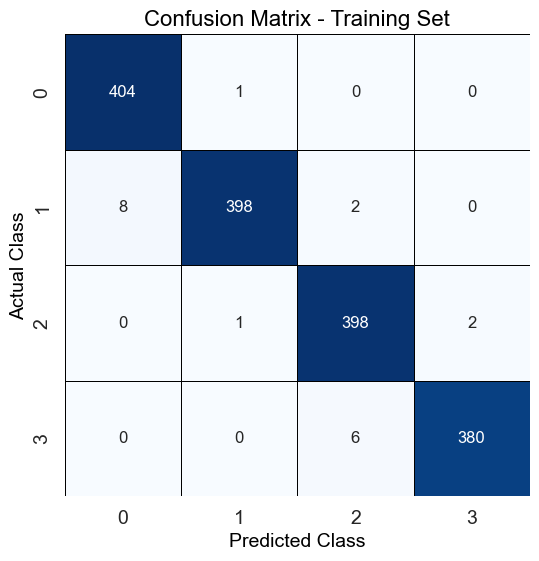

In [43]:
# Confusion matrix for training set
train_conf_matrix3 = confusion_matrix(y_train, y_train_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

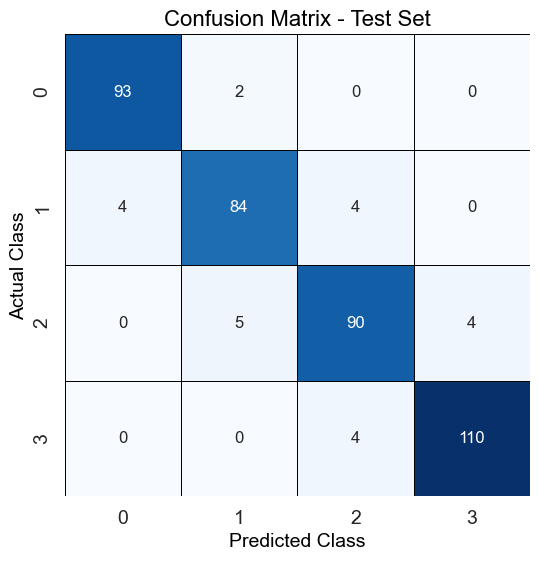

In [44]:
# Confusion matrix for test set
test_conf_matrix3 = confusion_matrix(y_test, y_test_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

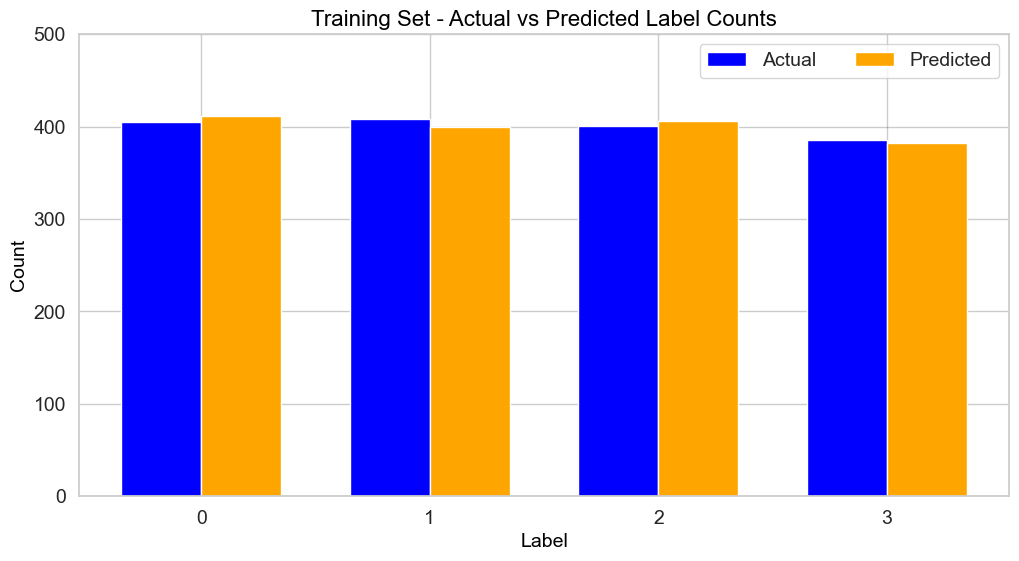

In [45]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts3 = pd.Series(y_train_pred_classes3).value_counts().sort_index()

# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,500)
plt.show()

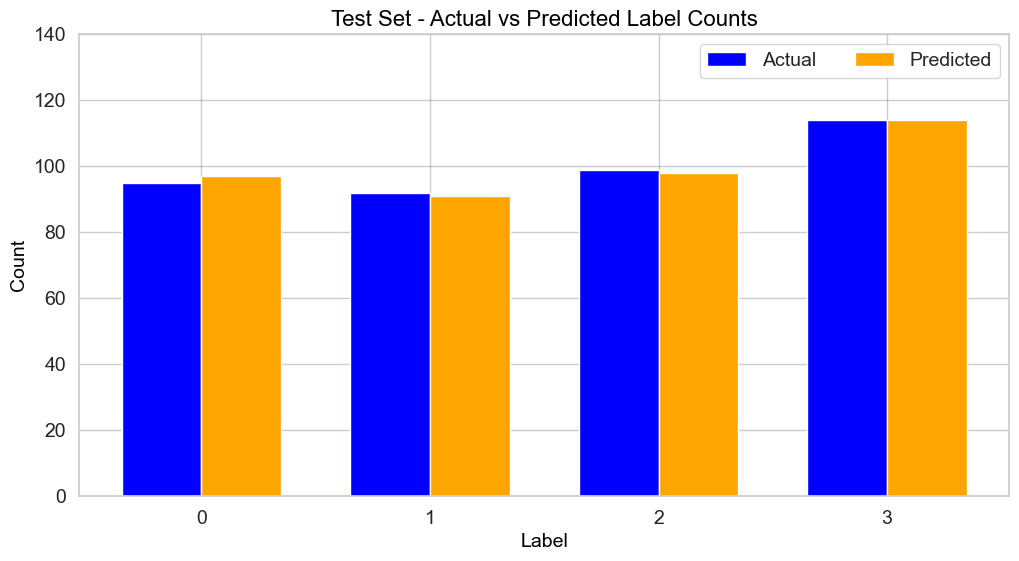

In [46]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts3 = pd.Series(y_test_pred_classes3).value_counts().sort_index()

# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,140)
plt.show()

In [47]:
model3.save('NN_Sigmoid_MobilePrice.h5')

***